In [150]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
# from sklearn.decomposition import PCA
# from sklearn.pipeline import make_pipeline

x_url = []
y_url = []
for tmp in range(1,18):
  x_url.append('https://raw.githubusercontent.com/miclas/fromBegin/master/dataset/x_train_CA'+str(tmp)+ '.csv')
  y_url.append('https://raw.githubusercontent.com/miclas/fromBegin/master/dataset/y_train_CA'+str(tmp)+ '.csv')

importing libraries and creating a list with links to data

In [151]:
def dataPrep(urlx, urly):
    df_x = pd.read_csv(urlx, header = None, names=["feat"+str(a) for a in range(1,97)])
    df_y = pd.read_csv(urly, header = None, names = ['Label'])
    
    if df_x.isnull().sum().sum() > 0:
        imr = SimpleImputer(missing_values=np.nan, strategy='mean')
        imr_x = imr.fit(df_x.values)
        imputed_data_x = imr_x.transform(df_x.values)
        df_x = imputed_data_x
    if df_y.isnull().sum().values > 0:
        imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        imr_y = imr.fit(df_y.values)
        imputed_data_y = imr_y.transform(df_y.values)
        df_y = imputed_data_y

    for tmp in range(len(df_y)):
        if df_y['Label'][tmp] > 0.5:
            df_y['Label'][tmp] = 1
        else:
            df_y['Label'][tmp] = 0

    y = df_y.values
    x = df_x.values


    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1, stratify=y)
    
    y_train=np.ravel(y_train)
    y_test=np.ravel(y_test)
    y = np.ravel(y)

    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)

    return X_train_std, X_test_std, y_train, y_test, x, y

Downloading and preparation data

(df_x, df_y) - created DataFrame using read_csvs from pandas library

isnull() - this method return '1' for each missing value in data

SimpleImputer - this method puts the values (defined by 'strategy') in the places marked 'missing_values' in the data, first uses 'fit' to determine the parameters through the training data, then 'transform' uses these parameters to modify the data 

train_test_split - dividing the data into training and test subsets, 'test_size=0.3' mean that 30% of data will be test subset, 'stratify=y' means returning the training and test subsets having the same proportions as the input training dataset, random_state - random data generator seed 

revel() - changing the vector to a one-dimensional array 

StandarScaler - scaling features, 'fit' determines the mean value of the samples and standard deviation then 'transform' based on these parameters standardizes all samples to make the classifier work more efficiently

In [152]:
def randForest(X_train_std, X_test_std, y_train, y_test, crit='gini', n_estima=100):

    forest = RandomForestClassifier(criterion=crit,
                                    n_estimators=n_estima, 
                                    random_state=1,
                                    n_jobs=4)
    forest.fit(X_train_std, y_train)
    y_pred = forest.predict(X_test_std)
    print('Accuracy of predicting labels for the test data: %.3f' % accuracy_score(y_test, y_pred))
    return forest


RandomForestClassfier - averages multiple decision trees, criterion - 'pollution indicator' - 'gini' or 'entropy', n_estimators - how many tree the classification consist, n_jobs - number of processor cores used to train the model ('-1' means all cores)

fit() - training model parameters while training the estimators of the classification process 

predict() - predicts data labels based on the learned model

accuracy_score - compares the prodicted labels with those in the test subsets 

In [153]:
def decTree(X_train_std, X_test_std, y_train, y_test, crit='gini', depth=10):
    tree = DecisionTreeClassifier(criterion=crit, 
                                  max_depth=depth, 
                                  random_state=1)
    tree.fit(X_train_std, y_train)
    y_pred = tree.predict(X_test_std)
    print('Accuracy of predicting labels for the test data: %.3f' % accuracy_score(y_test, y_pred))
    return tree

DecisionTreeClassifier - breaking down data by making decisions based on asking a series of questions, criterion - 'pollution indicator' - 'gini', 'entropy' or 'error', max_depth - max number of decision steps

In [154]:
def treePng(tree, size=500):
    dot_data = export_graphviz(tree,
                            filled=True, 
                            rounded=True,
                            class_names=['Label_0', 
                                            'Label_1'],
                            feature_names=["feat"+str(a) for a in range(1,97)],
                            out_file=None) 
    graph = graph_from_dot_data(dot_data) 
    graph.write_png('drzewo.png') 

    return Image(filename='./drzewo.png', width=size)

treePng - creating a decision tree image 

In [155]:
def supVec(X_train_std, X_test_std, y_train, y_test, core='rbf', gam=0.1, pC=10):
    svm = SVC(kernel=core, random_state=1, gamma=gam, C=pC)
    svm.fit(X_train_std, y_train)
    y_pred = svm.predict(X_test_std)
    print('Accuracy of predicting labels for the test data: %.3f' % accuracy_score(y_test, y_pred))
    return svm

SVC - support vector machine - kernel = 'linear' for linear classification problems and 'rbf' for nonlinear classification problems, gamma - Gaussian sphere boundary area, C - the amount of the penalty for incorrect classification

In [156]:
def kNeighbors(X_train_std, X_test_std, y_train, y_test, neighbors=5, pP=2, met='minkowski'):
    knn = KNeighborsClassifier(n_neighbors=neighbors, p=pP, metric=met)
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_test_std)
    print('Accuracy of predicting labels for the test data: %.3f' % accuracy_score(y_test, y_pred))
    return knn

k-nearest neighbor classifier - classifies by closest neighbors, 'n_neighbors' - number of neighbours, 'p' and 'metric' - distance metrics  

In [157]:
def logReg(X_train_std, X_test_std, y_train, y_test, pC=100, iter=250):
    lr = LogisticRegression(C=pC, random_state=1, max_iter=iter)
    lr.fit(X_train_std, y_train)
    y_pred = lr.predict(X_test_std)
    print('Accuracy of predicting labels for the test data: %.3f' % accuracy_score(y_test, y_pred))
    return lr

LogisticRegression - 'C' - determines the strength of regularization, 'max_iter' - maximum number of iterations 

In [158]:
def crossVal(X_train_std, X_test_std, y_train, y_test, estim, pCV=10):
    scores = cross_val_score(estimator=estim,
                             X=X_train_std,
                             y=y_train,
                             cv=10,
                             n_jobs=-1)
    print('Test accuracy results:  %s' % scores)
    print('Accuracy of the test: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

cross_val_score - randomly divides the data set into training and test subsets ('cv' number of different divisions), performs the classification ('estimator') and returns the results of the forecasts made 

In [159]:
X_train_std, X_test_std, y_train, y_test, x, y = dataPrep(x_url[0], y_url[0])
lr = logReg(X_train_std, X_test_std, y_train, y_test, pC=100, iter=550)

Accuracy of predicting labels for the test data: 0.997


For CA1 the model created with LogisticRegression correctly predicted 99.7% of the labels 

In [160]:
X_train_std, X_test_std, y_train, y_test, x, y = dataPrep(x_url[1], y_url[1])
forest = randForest(X_train_std, X_test_std, y_train, y_test, crit='gini', n_estima=350)

Accuracy of predicting labels for the test data: 0.931


Accuracy of predicting labels for the test data: 0.991


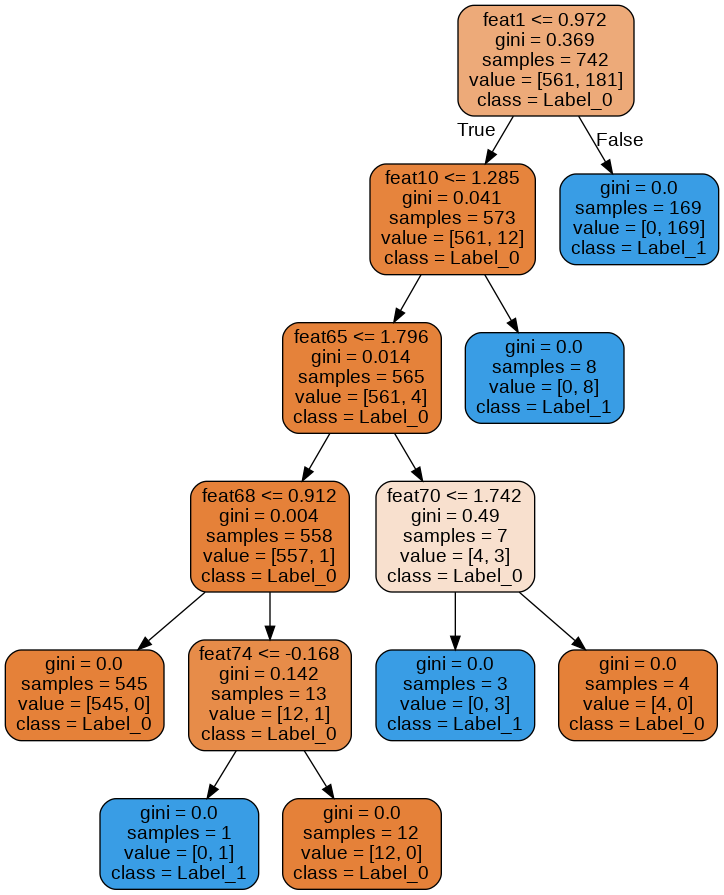

In [161]:
X_train_std, X_test_std, y_train, y_test, x, y = dataPrep(x_url[2], y_url[2])
tree = decTree(X_train_std, X_test_std, y_train, y_test, crit='gini', depth=10)
treePng(tree, size=500)

In [162]:
X_train_std, X_test_std, y_train, y_test, x, y = dataPrep(x_url[3], y_url[3])
knn = kNeighbors(X_train_std, X_test_std, y_train, y_test, neighbors=10, pP=2, met='minkowski')

Accuracy of predicting labels for the test data: 0.975


In [163]:
X_train_std, X_test_std, y_train, y_test, x, y = dataPrep(x_url[4], y_url[4])
svm = supVec(X_train_std, X_test_std, y_train, y_test, core='rbf', gam=0.1, pC=10)

Accuracy of predicting labels for the test data: 0.981


In [164]:
X_train_std, X_test_std, y_train, y_test, x, y = dataPrep(x_url[5], y_url[5])
lr = logReg(X_train_std, X_test_std, y_train, y_test, pC=100, iter=550)

Accuracy of predicting labels for the test data: 0.990


In [165]:
X_train_std, X_test_std, y_train, y_test, x, y = dataPrep(x_url[6], y_url[6])
forest = randForest(X_train_std, X_test_std, y_train, y_test, crit='entropy')
crossVal(X_train_std, X_test_std, y_train, y_test, forest, pCV=10)

Accuracy of predicting labels for the test data: 0.978
Test accuracy results:  [0.97333333 0.98666667 0.98648649 0.97297297 1.         0.95945946
 0.98648649 1.         0.98648649 0.98648649]
Accuracy of the test: 0.984 +/- 0.012


the result of the classification with RandomForestClassifier and the results obtained with k-fold cross-checking 

Accuracy of predicting labels for the test data: 0.975


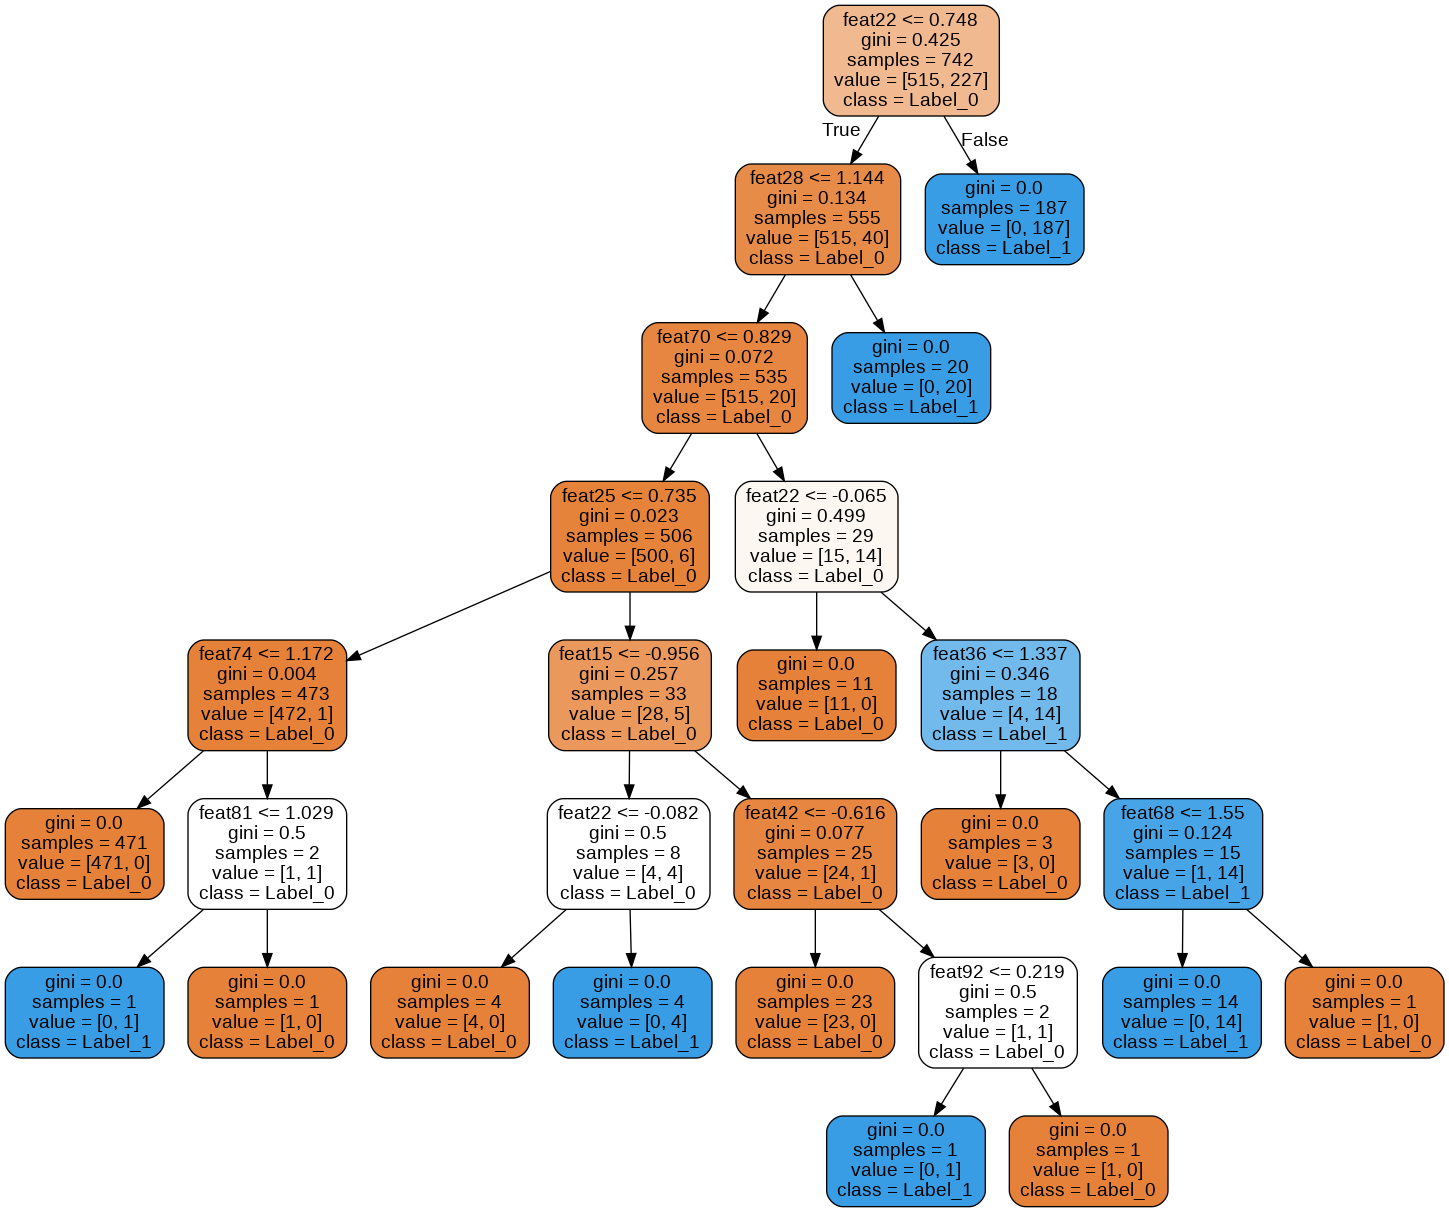

In [166]:
X_train_std, X_test_std, y_train, y_test, x, y = dataPrep(x_url[7], y_url[7])
tree = decTree(X_train_std, X_test_std, y_train, y_test, crit='gini', depth=10)
treePng(tree, size=700)

In [167]:
X_train_std, X_test_std, y_train, y_test, x, y = dataPrep(x_url[8], y_url[8])
knn = kNeighbors(X_train_std, X_test_std, y_train, y_test, neighbors=10, pP=2, met='minkowski')

Accuracy of predicting labels for the test data: 0.997


In [168]:
X_train_std, X_test_std, y_train, y_test, x, y = dataPrep(x_url[9], y_url[9])
lr = logReg(X_train_std, X_test_std, y_train, y_test, pC=100, iter=550)

Accuracy of predicting labels for the test data: 0.994


Accuracy of predicting labels for the test data: 0.969


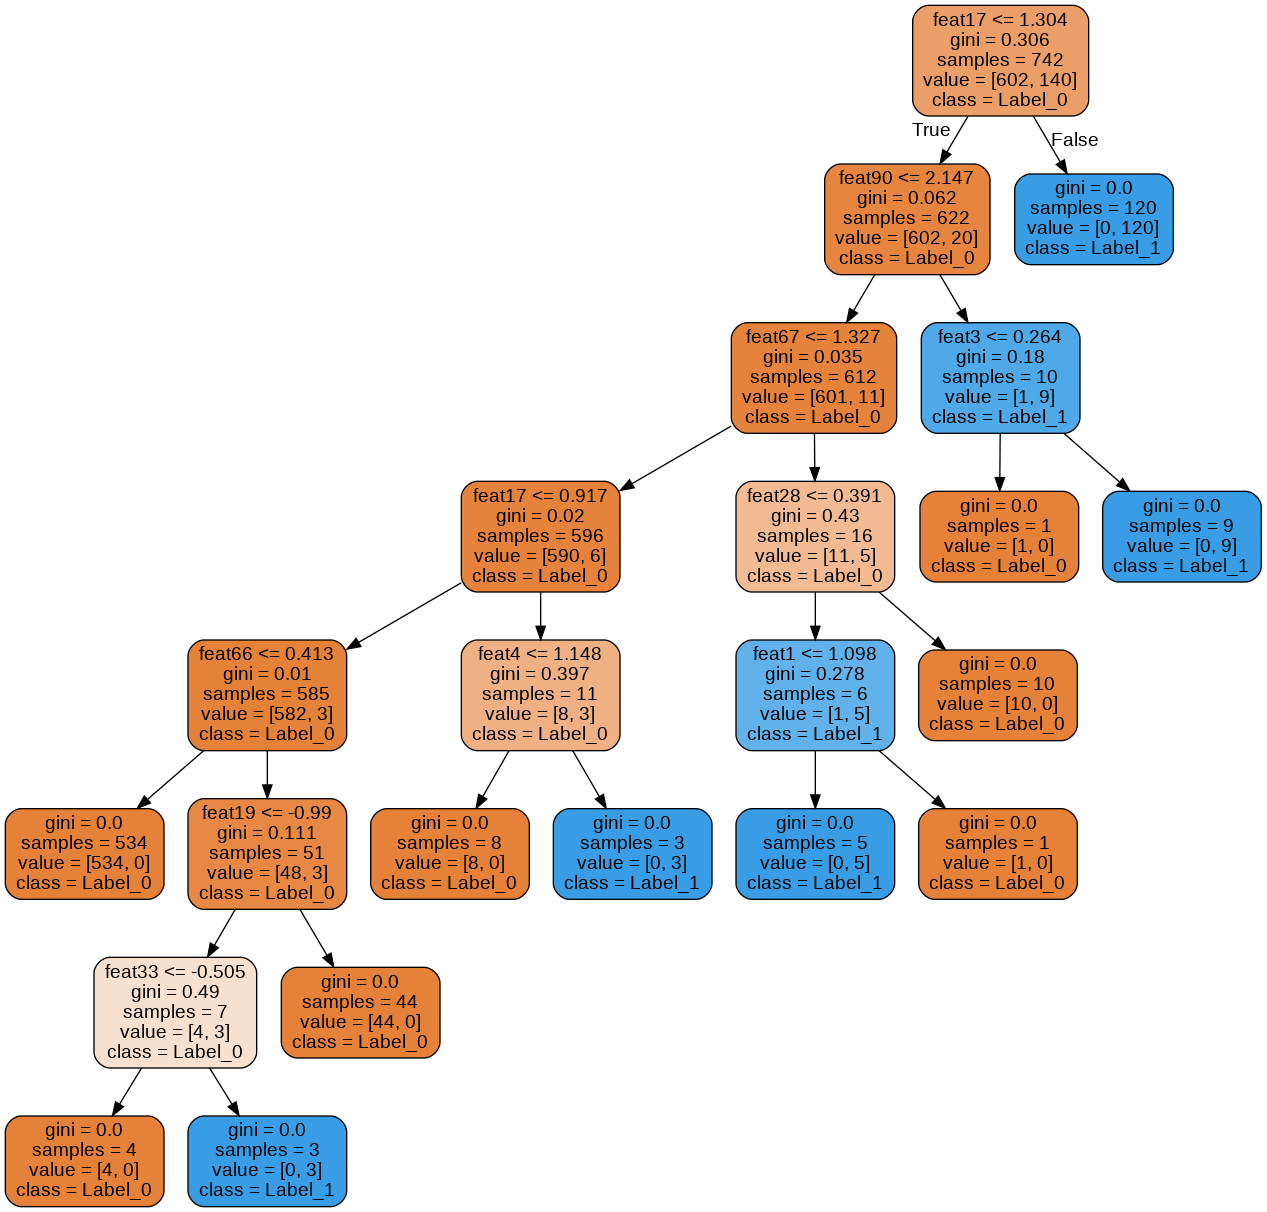

In [169]:
X_train_std, X_test_std, y_train, y_test, x, y = dataPrep(x_url[10], y_url[10])
tree = decTree(X_train_std, X_test_std, y_train, y_test, crit='gini', depth=10)
treePng(tree, size=500)

In [170]:
X_train_std, X_test_std, y_train, y_test, x, y = dataPrep(x_url[11], y_url[11])
forest = randForest(X_train_std, X_test_std, y_train, y_test, crit='entropy')

Accuracy of predicting labels for the test data: 1.000


In [171]:
X_train_std, X_test_std, y_train, y_test, x, y = dataPrep(x_url[12], y_url[12])
forest = randForest(X_train_std, X_test_std, y_train, y_test, crit='entropy')

Accuracy of predicting labels for the test data: 0.956


In [172]:
X_train_std, X_test_std, y_train, y_test, x, y = dataPrep(x_url[13], y_url[13])
knn = kNeighbors(X_train_std, X_test_std, y_train, y_test, neighbors=10, pP=2, met='minkowski')
crossVal(X_train_std, X_test_std, y_train, y_test, knn, pCV=10)

Accuracy of predicting labels for the test data: 0.987
Test accuracy results:  [1.         1.         1.         0.97297297 0.98648649 0.98648649
 0.98648649 0.98648649 0.98648649 1.        ]
Accuracy of the test: 0.991 +/- 0.009


In [173]:
X_train_std, X_test_std, y_train, y_test, x, y = dataPrep(x_url[14], y_url[14])
knn = kNeighbors(X_train_std, X_test_std, y_train, y_test, neighbors=10, pP=2, met='minkowski')

Accuracy of predicting labels for the test data: 0.972


In [174]:
X_train_std, X_test_std, y_train, y_test, x, y = dataPrep(x_url[15], y_url[15])
svm = supVec(X_train_std, X_test_std, y_train, y_test, core='rbf', gam=0.15, pC=5)
crossVal(X_train_std, X_test_std, y_train, y_test, svm, pCV=10)

Accuracy of predicting labels for the test data: 0.956
Test accuracy results:  [0.90666667 0.91891892 0.95945946 0.93243243 0.93243243 0.93243243
 0.91891892 0.93243243 0.91891892 0.93243243]
Accuracy of the test: 0.929 +/- 0.013


In [175]:
X_train_std, X_test_std, y_train, y_test, x, y = dataPrep(x_url[16], y_url[16])
svm = supVec(X_train_std, X_test_std, y_train, y_test, core='rbf', gam=0.1, pC=10)
crossVal(X_train_std, X_test_std, y_train, y_test, svm, pCV=10)

Accuracy of predicting labels for the test data: 0.982
Test accuracy results:  [0.98461538 0.98461538 1.         0.98461538 0.98461538 0.98461538
 0.984375   0.984375   0.984375   1.        ]
Accuracy of the test: 0.988 +/- 0.006
